Determining the SWT
$$
SWT =  \frac{(\sigma'_f)^2(2N_f)^{2b}}{E}+\sigma'_f\epsilon'_f(2N_F)^{b+c}
$$

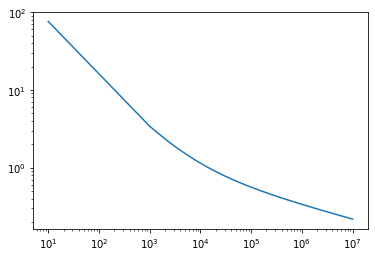

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sigma_f = 952.20
epsilon_f = 0.7371
b = -0.0890
c = -0.6640
E = 211600

Nf = np.linspace(10,10000000,10000)
SWT = (((sigma_f**2)*((2*Nf)**(2*b)))/E)+(sigma_f*epsilon_f*((2*Nf)**(b+c)))

def get_SWT(Nf):
    sigma_f = 952.20
    epsilon_f = 0.7371
    b = -0.0890
    c = -0.6640
    E = 211600
    return (((sigma_f**2)*((2*Nf)**(2*b)))/E)+(sigma_f*epsilon_f*((2*Nf)**(b+c)))

plt.yscale('log')
plt.xscale('log')
plt.plot(Nf,SWT)

## Weibull Distribution
---
If $X$ is a random variable denoting the _time to failure_, the __Weibull distribution__ gives a distribution for which the _failure rate_ is proportional to a power of time.

$$
f_X(x) = 
\frac{k}{\lambda}(\frac{x-\delta}{\lambda})^{k-1}e^{-(\frac{x-\delta}{\lambda})^k}
$$
$$
F_X(x) = 1-e^{-({\frac{x-\delta}{\lambda}})^k}
$$

where $k > 0$ is the __shape parameter__ 
and $\lambda > 0$ is the __scale parameter__.

__Finding X for a given $F_X$ (ppf Percent Point function (inverse of _CDF_ ) )__ 

$$
X = \lambda(-ln(1-F_X))^{\frac{1}{k}} + \delta
$$


In [3]:
from scipy.special import gamma
import math

class Weibull:
    '''
w = Weibull(shape:beta,scale:theta,position:lambda)

    '''
    def __init__(self,k,lmbda,delta):
        self.k = k
        self.lmbda = lmbda
        self.delta = delta
        self.x = (np.random.weibull(k,1000)*lmbda) + delta
        _,self.bins  = np.histogram(self.x,100,density=True)


    def pdf(self):
        x = self.bins
        k = self.k
        lmbda = self.lmbda
        delta =  self.delta
        return ((k/lmbda)*((x-delta)/lmbda)**(k-1))*(np.exp(-((x-delta)/lmbda)**k))

    def cdf(self):
        x = self.bins
        k = self.k
        lmbda = self.lmbda
        delta = self.delta
        return 1- np.exp(-((x-delta)/lmbda)**k)

    def failure_rate(self):
        x = self.x
        k = self.k
        lmbda = self.lmbda
        return (k/lmbda)*((x/lmbda)**(k-1))

    def E_x(self):
        k = self.k
        lmbda = self.lmbda
        return lmbda*(gamma(1+1/k))

    def var_x(self):
        k = self.k
        lmbda = self.lmbda
        return (lmbda**2)*(gamma(1+(2/k))-((gamma(1+(1/k)))**2))

    def plot_pdf(self):
        plt.plot(self.bins,self.pdf())
    
    def plot_cdf(self):
        plt.plot(self.bins,self.cdf())

    def plot_fr(self):
        plt.plot(self.bins,self.failure_rate())
    
    def plot_hist(self):
        plt.hist(self.x)

    def find_x(self,F_x):
        return (self.lmbda)*((-math.log(1-F_x))**(1/self.k)) + self.delta
w = Weibull(25,12.887,25.5146)

X = w.find_x(0.5)
print('X:(the one with 0.5 CDF)',X)


X:(the one with 0.5 CDF) 38.21404808292718


> Moving Forward 
$$
X = log(\frac{SWT}{SWT_0})log(\frac{N_f}{N_0}) \\
log(\frac{SWT}{SWT_0}) = \frac{X}{log(\frac{N_f}{N_0})} \\ \\
log(SWT) - log(SWT_0) = \frac{X}{log(N_f)-log(N_0)} \\
log(SWT)  = \frac{X}{log(N_f)-log(N_0)} + log(SWT_0) \\
$$

__Trying to Find $log(N_0)$ and $log(SWT_0)$__

$$
logN_0^2 - (logN_{f1}+logN_{f2})logN_0 +(logN_{f1}logN_{f2} - \frac{X(logN_{f2}-logN_{f1})}{logSWT-logSWT_0})  = 0
$$

`looks like`
$$
x^2 + bx +c = 0
$$


$$
\\ \\
a = 1 \\ \\
b = logN_{f1} - logN_{f2} \\ \\
c = \frac{X(logN_{f2} - logN_{f1})}{logSWT_1-logSWT_0}
$$

In [31]:
#Solving Eq'n
import math

def sol_eqn(a,b,c):
    D = (b**2)-(4*a*c)
    x1 = ((-b)+(math.sqrt(D)))/(2*a)
    x2 = ((-b)-(math.sqrt(D)))/(2*a)
    return x1,x2


(1.0, 1.0)

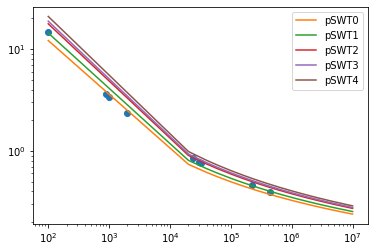

In [50]:
w = Weibull(25,12.887,25.5146)
X = w.find_x(0.5)

#get_SWT
def get_SWT(Nf):
    sigma_f = 952.20
    epsilon_f = 0.7371
    b = -0.0890
    c = -0.6640
    E = 211600
    return (((sigma_f**2)*((2*Nf)**(2*b)))/E)+(sigma_f*epsilon_f*((2*Nf)**(b+c)))

def sol_eqn(a,b,c):
    D = (b**2)-(4*a*c)
    x1 = ((-b)+(math.sqrt(D)))/(2*a)
    x2 = ((-b)-(math.sqrt(D)))/(2*a)
    return x1,x2

def getN0SWT0(Nf1,Nf2):
    SWT1 = get_SWT(Nf1)
    SWT2 = get_SWT(Nf2)
    
    a = 1
    b = math.log(Nf1)+math.log(Nf2)
    c = math.log(Nf1)*math.log(Nf2) - ((X*(math.log(Nf2)-math.log(Nf1)))/(math.log(SWT1)+math.log(SWT2)))
    
    logN0,_ = sol_eqn(a,b,c)
    logSWT0 = math.log(SWT1) - (X/(math.log(Nf1)-logN0))
    return logN0,logSWT0

# mean of logN0 and logSWT0

def meanlogN0logSWT0(Nf):
    l = [(i,j) for i in Nf for j in Nf if i!=j]
    logN0 = []
    logSWT0 = []
    for n in l:
        try:
            logN0_tmp,logSWT0_tmp = getN0SWT0(*n)
        except ValueError:
            continue
        logN0.append(logN0_tmp)
        logSWT0.append(logSWT0_tmp)
    #plt.hist(logSWT0)
    return np.array(logN0).mean(),np.array(logSWT0).mean()
    

Nf = np.linspace(100,10000000,500)

Nfd = np.array([100,900,1000,2000,29683,23489,32526,224728,437357])
SWTd = get_SWT(Nfd)
#logN0,logSWT0 = meanlogN0logSWT0(Nf)

#print(logN0,logSWT0)
X0 = w.find_x(0.005)
X1 = w.find_x(0.05)
X2 = w.find_x(0.5)
X3 = w.find_x(0.75)
X4 = w.find_x(0.99)

pSWT0 = np.exp((X0/(np.log(Nf)- (-np.log(4.1079))))  - np.log(32.4317))
pSWT1 = np.exp((X1/(np.log(Nf)- (-np.log(4.1079))))  - np.log(32.4317))
pSWT2 = np.exp((X2/(np.log(Nf)- (-np.log(4.1079))))  - np.log(32.4317))
pSWT3 = np.exp((X3/(np.log(Nf)- (-np.log(4.1079))))  - np.log(32.4317))
pSWT4 = np.exp((X4/(np.log(Nf)- (-np.log(4.1079))))  - np.log(32.4317))

plt.xscale('log')
plt.yscale('log')
plt.plot(Nfd,SWTd,'o')
plt.plot(Nf,pSWT0, label="pSWT0")
plt.plot(Nf,pSWT1, label="pSWT1")
plt.plot(Nf,pSWT2, label="pSWT2")
plt.plot(Nf,pSWT3, label="pSWT3")
plt.plot(Nf,pSWT4, label="pSWT4")
plt.legend()

In [31]:
np.log(4)

1.3862943611198906